# Ejemplos de aplicación

En este notebook ilustraremos algunos ejemplos en python donde se ilustre lo visto en clase.

## Ejemplo 1 - Funciones de Bessel

La funcion de Bessel, se define por la siguiente serie:

$$ J_n(x) = \sum_{s=0}^{ \infty}\frac{(-1)^s}{s!(n+s)!}\left(\frac{x}{2}\right)^{n+2s}$$

donde $n$ es el orden de la funcion de Bessel, con $n=0,1,2,...$

Se va a crear una función que permita calcular las funciones dado un valor de $n$ y $x$

### Usando python nativo

In [1]:
import math as m

# Form 1 : with native python and while with error estimation
def bessel1_with_error(n,x, error = 1e-4):
    
    # Initialize values
    #-----------------------
    sn = 1 # old sum  --> Sn
    sn1 = 0 # new sum --> S_(n+1)
    s = 0 # counter
    
    while m.fabs( sn1 - sn ) > error:
        sn = sn1
        sn1 = sn1 + (-1)**s/(m.factorial(s)*m.factorial(n+s)) * (0.5*x)**(n+2*s)
        s = s + 1 # increment s counter by 1
    return sn1   

# Form 1 : with native python and for with number of terms
def bessel1_with_nterm(n,x,nterm=10):
    sn = 0.0
    an = 0.0
    for s in range(nterm):
        an = ( (-1.0)**s/( m.factorial(s)*m.factorial(n+s) ) )*(x/2.0)**(n+2.0*s)
        sn = sn + an
    return sn

Verifiquemos si las funciones trabajan correctamente:

In [2]:
bessel1_with_error(0,0), bessel1_with_error(0,1), bessel1_with_nterm(0,1,7)

(1.0, 0.76519775390625, 0.76519768656036)

Determinemos el tiempo que le lleva a python en ejecutar esta función:

In [3]:
%%timeit
bessel1_with_nterm(0,1,15)

8.48 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Comencemos ahora a definir algunos parámetros iniciales que se necesitan. Se va a generar una lista con valores de $x$ en donde se quiere calcular la funcion de Bessel. Igualmente se define el número de terminos usados en la serie:

In [4]:
xmin = 0.0
xmax = 10.0
deltax = 0.01
Nsteps = int( (xmax-xmin)/deltax )
nterm  = 15
x = [ xmin + i*deltax  for i in range(Nsteps) ]
yn = []
ns = range(4)

Se valida la longitud del vector:

In [5]:
len(x)

1000

Se calcula la funcion de Bessel de orden $n$, con $n=0,1,2,3$ para cada valor de $x$ dado por el vector `x`. El resultado se va guardando en una lista inicialmente vacia:

In [6]:
for n in ns:
    y = []
    for i in range(len(x)): # len(x) or Nsteps
        y.append(bessel1_with_nterm(n,x[i],nterm))
    yn.append(y)

In [7]:
len(yn), len(yn[0]), len(yn[0])

(4, 1000, 1000)

Se grafica la funcion usando matplotlib. Puede consultar el manejo basico de esta libreria en el notebook [Matplotlib_básico](https://nbviewer.jupyter.org/urls/gitlab.com/udea1/data-analytic/-/raw/master/Matplotlib_basico.ipynb?flush_cache=true)

Text(0, 0.5, '$J_n(x)$')

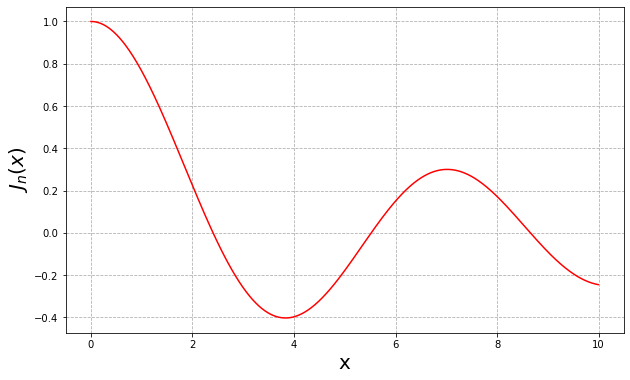

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(x, yn[0], 'r-')
plt.grid(linestyle="--")
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$J_n(x)$",fontsize=20)

Grafiquemos ahora varias funciones en una misma figura:

Text(0, 0.5, '$J_n(x)$')

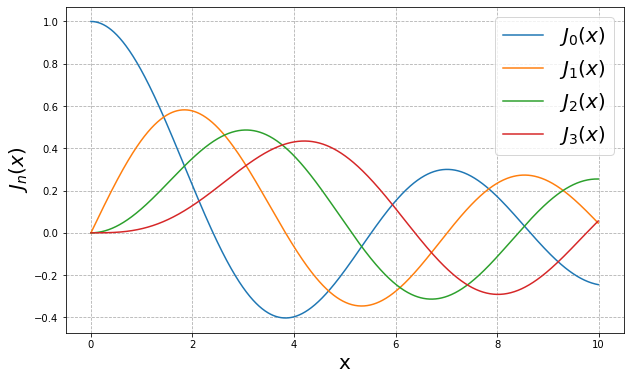

In [9]:
labels = [f"$J_{i}(x)$" for i in ns]
plt.figure(figsize=(10,6))

for n in ns:
    plt.plot(x, yn[n], '-', label = labels[n])

plt.grid(linestyle="--")
plt.xlabel("x",fontsize=20)
plt.legend(fontsize=20)
plt.ylabel(r"$J_n(x)$",fontsize=20)

In [10]:
labels

['$J_0(x)$', '$J_1(x)$', '$J_2(x)$', '$J_3(x)$']

### Usando numpy

Veamos ahora como se haria el mismo proceso anterior usando NumPy:

In [11]:
import numpy as np
from scipy.special import factorial as fact

def bessel2_with_nterm(n,x,nterm):
    s = np.arange(nterm)
    return np.sum( (-1)**s/( fact(s) * fact(n+s) )*(0.5*x)**(n+2*s) )    

In [12]:
%%timeit
bessel2_with_nterm(0,1,15)

17.8 µs ± 200 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
x = np.linspace(xmin,xmax,10)
bessel2_with_nterm(0,x,15)    

ValueError: operands could not be broadcast together with shapes (10,) (15,) 

Noten que el error anterior se debe a un problema de boradcasting. No se pueden hacer esas operaciones debido a que los tamaños(shape) de los arrays usados no coincide y no cumple los criterios de broadcasting de numpy.
Puede consultar sobre esto en:
 * [https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)
 * [https://realpython.com/numpy-array-programming/](https://realpython.com/numpy-array-programming/) 
 * [https://eli.thegreenplace.net/2015/broadcasting-arrays-in-numpy/](https://eli.thegreenplace.net/2015/broadcasting-arrays-in-numpy/)
 * [https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html)
 * [http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc](http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)

In [14]:
bessel1_with_nterm(0,x,15) 

array([ 1.        ,  0.71437185,  0.09804337, -0.35142283, -0.33295586,
        0.01203058,  0.28172071,  0.21983546, -0.06238938, -0.24544005])

Text(0, 0.5, '$J_n(x)$')

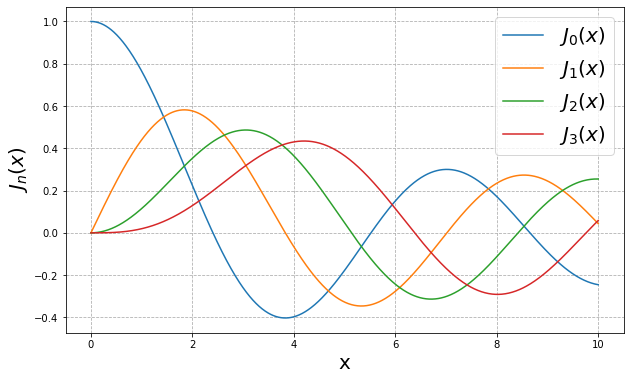

In [15]:
x = np.linspace(xmin,xmax,1000)
ns = range(4)
labels = [f"$J_{i}(x)$" for i in ns]
plt.figure(figsize=(10,6))

for n in ns:
    plt.plot(x, bessel1_with_nterm(n,x,nterm=15), '-', label = labels[n])

plt.grid(linestyle="--")
plt.xlabel("x",fontsize=20)
plt.legend(fontsize=20)
plt.ylabel(r"$J_n(x)$",fontsize=20)

Veamos que pasa con el broadcasting:

In [16]:
s = np.arange(10)
x = np.arange(5)

In [17]:
x**s

ValueError: operands could not be broadcast together with shapes (5,) (10,) 

In [24]:
x[np.newaxis,:].shape, x[:,np.newaxis].shape

((1, 5), (5, 1))

In [25]:
x[None,:].shape, x[:,None].shape

((1, 5), (5, 1))

In [28]:
s[None,:].shape, s[:, None].shape,s.shape

((1, 10), (10, 1), (10,))

In [27]:
x,s

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [29]:
x[:,None],x[None,:]

(array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([[0, 1, 2, 3, 4]]))

In [31]:
x[:,None]**s, (x[:,None]**s).shape

(array([[     1,      0,      0,      0,      0,      0,      0,      0,
              0,      0],
        [     1,      1,      1,      1,      1,      1,      1,      1,
              1,      1],
        [     1,      2,      4,      8,     16,     32,     64,    128,
            256,    512],
        [     1,      3,      9,     27,     81,    243,    729,   2187,
           6561,  19683],
        [     1,      4,     16,     64,    256,   1024,   4096,  16384,
          65536, 262144]]),
 (5, 10))

In [30]:
x[None,:]**s

ValueError: operands could not be broadcast together with shapes (1,5) (10,) 

In [95]:
x.reshape((len(x),1))

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [32]:
x,x[:,None],np.sum(x),np.sum(x[:,None],axis=1),

(array([0, 1, 2, 3, 4]),
 array([[0],
        [1],
        [2],
        [3],
        [4]]),
 10,
 array([0, 1, 2, 3, 4]))

In [33]:
nterm = 15
N = 5
s = np.arange(nterm)
x = np.linspace(xmin,xmax,N)
xp  = x[:,None]
n = 0
Sn = (-1)**s/( fact(s) * fact(n+s) )*(0.5*xp)**(n+2*s)
Sn

array([[ 1.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.56250000e+00,  6.10351562e-01,
        -1.05963813e-01,  1.03480286e-02, -6.46751788e-04,
         2.80708241e-05, -8.95115565e-07,  2.18534074e-08,
        -4.21554926e-10,  6.58679572e-12, -8.50567629e-14,
         9.22924944e-16, -8.53295991e-18,  6.80242340e-20],
       [ 1.00000000e+00, -6.25000000e+00,  9.76562500e+00,
        -6.78168403e+00,  2.64909532e+00, -6.62273831e-01,
         1.14978096e-01, -1.46655734e-02,  1.43218490e-03,
        -1.10508094e-04,  6.90675591e-06, -3.56753921e-07,
         1.54841111e-08, -5.72637246e-10,  1.82601163e-11],
       [ 1.00000000e+00, -1.40625000e+01,  4.94384766e+01,
        -7.72476196e+01,  6.78934157e+01, -3.81900463

In [34]:
jn_by_x = np.sum(Sn,axis=1)
jn_by_x

array([ 1.        , -0.04838378, -0.17759677,  0.26633975, -0.24544005])

In [35]:
def bessel3_with_nterm(n,x,nterm):
    s = np.arange(nterm)
    xp = np.asarray(x)
    if xp.size>1:
        xp = np.array(x)[:,None]
        return np.sum( (-1)**s/( fact(s) * fact(n+s) )*(0.5*xp)**(n+2*s), axis = 1 )
    else:
        return np.sum( (-1)**s/( fact(s) * fact(n+s) )*(0.5*xp)**(n+2*s), axis = 0)

In [36]:
bessel3_with_nterm(0,1,15)

0.7651976865579666

In [37]:
bessel3_with_nterm(0,[0,1],15)

array([1.        , 0.76519769])

In [38]:
bessel3_with_nterm(0,np.array([0,1]),15)

array([1.        , 0.76519769])

In [39]:
%%timeit
for x in [0,1]:
    y = bessel1_with_nterm(0,x,15)

17.9 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
%%timeit
bessel3_with_nterm(0,np.array([0,1]),15)

27.7 µs ± 410 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Text(0, 0.5, '$J_n(x)$')

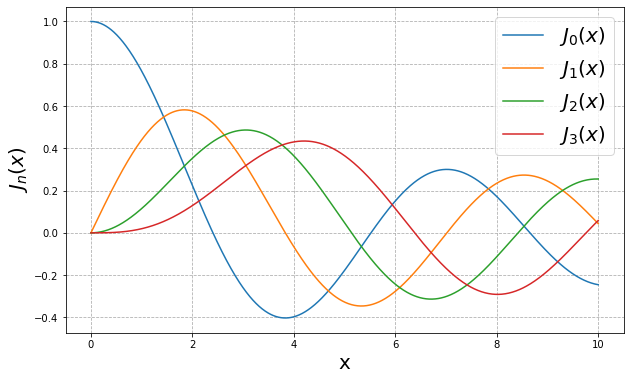

In [41]:
x = np.linspace(xmin,xmax,1000)
ns = range(4)
labels = [f"$J_{i}(x)$" for i in ns]
plt.figure(figsize=(10,6))

for n in ns:
    plt.plot(x, bessel3_with_nterm(n,x,nterm=15), '-', label = labels[n])

plt.grid(linestyle="--")
plt.xlabel("x",fontsize=20)
plt.legend(fontsize=20)
plt.ylabel(r"$J_n(x)$",fontsize=20)

## Ejemplo 2 - Integracion por montecarlo

Se quiere resolver la siguiente integral:

$$ \int_0^1 x(1-x)\sin^2(100x(1-x))dx$$

Como la funcion es muy oscilatoria, muchos métodos tradicionales fallan. Una forma de resolverla es por medio del método montecarlo, el cual es un proceso estocastico

Primero, se define una region de interes en donde se va a trabajar dicha función: $ R=\{(x,y): 0 \leq x \leq 1,  0 \leq y \leq 0.25\} $

El método consiste en generar un numero considerable de puntos (pares ordenados) al azar dentro de la caja (distribución uniforme) y contar cuantos puntos quedan por debajo de la curva. El area estimada queda dada por:

&nbsp;

$$ Area \approx \text{area de la caja} \times \dfrac{\text{nñumero de puntos dentro de la curva}}{\text{total de pares de puntos}}$$


&nbsp;

Verifiquemos la función un la caja gráficamente

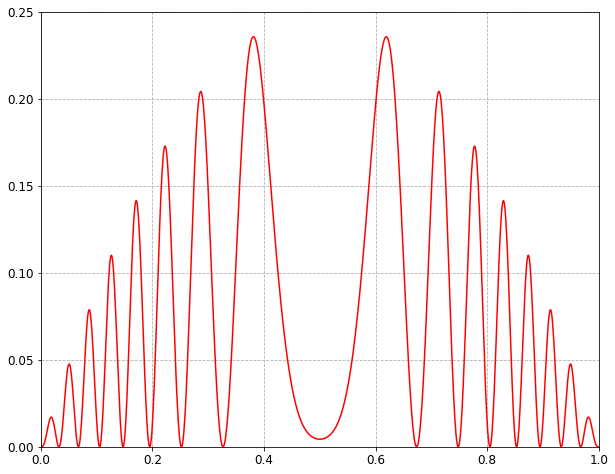

In [160]:
import matplotlib.pyplot as plt
import numpy as np


def function(x):
    return  x*(1-x)*np.sin(100*x*(1-x))**2

x = np.linspace(0,1,1000)
y = function(x)
plt.figure(figsize=(10,8))
plt.plot(x,y,'r-')
plt.xlim((0,1))
plt.ylim((0,0.25))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(ls="--")

In [167]:
xmax=1
ymax=0.25
npoints = 1000
x = np.random.uniform(0,xmax,npoints)
y = np.random.uniform(0,ymax,npoints)
inside = y < function(x)
area = ( ymax*xmax ) * inside.sum()/npoints
print("Area is approximated to: ",area)

Area is approximated to:  0.07


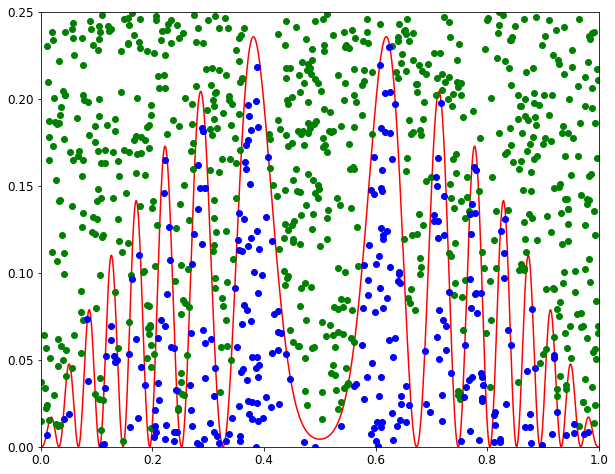

In [171]:
plt.figure(figsize=(10,8))
xp = np.linspace(0,xmax,1000)
plt.plot(xp,function(xp),'r-');
plt.plot(x[~inside],y[~inside],'og');
plt.plot(x[inside],y[inside],'ob');
plt.xlim((0,1));
plt.ylim((0,0.25));
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

De acuerdo a [WolframAlpha](https://www.wolframalpha.com/input/?i=integrate+from+0+to+1+of+x%281-x%29%5Csin%5E2%28100x%281-x%29%29), el resultado de la integral es 0.0754392

## Ejemplo 3 - k-nearest neighbors sencillo

 * [https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/](https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/)
 * [https://rpubs.com/Kataniss/636518](https://rpubs.com/Kataniss/636518)
 * [https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26](https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26)

In [206]:
import numpy as np
import matplotlib.pyplot as plt

npoints = 100

x1 = np.random.uniform(0.1,0.5,npoints)
y1 = np.random.normal(0.6,0.1,npoints)
x2 = np.random.uniform(0.4,0.8,npoints)
y2 = np.random.normal(0.8,0.2,npoints)

(0.0, 1.5)

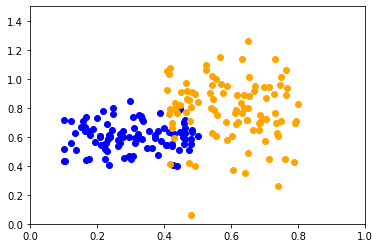

In [211]:
plt.plot(x1,y1,'o',color="blue")
plt.plot(x2,y2,'o',color="orange")
plt.xlim((0,1))
plt.ylim((0,1.5))

In [277]:
tag1 = np.full_like(x1,0) # blue
tag2 = np.full_like(x2,1) # orange
group1 = np.column_stack((x1,y1,tag1))
group2 = np.column_stack((x2,y2,tag2))

In [278]:
group1[:10],group2[:10]

(array([[0.19425557, 0.5639868 , 0.        ],
        [0.16444631, 0.64142696, 0.        ],
        [0.27731146, 0.6409435 , 0.        ],
        [0.23849201, 0.60573702, 0.        ],
        [0.46147309, 0.62397001, 0.        ],
        [0.16760736, 0.73353876, 0.        ],
        [0.21759669, 0.77761426, 0.        ],
        [0.40979913, 0.54389373, 0.        ],
        [0.45817524, 0.55077681, 0.        ],
        [0.22818672, 0.68716794, 0.        ]]),
 array([[0.74028538, 0.60397679, 1.        ],
        [0.54359332, 0.62917531, 1.        ],
        [0.76721251, 0.93399072, 1.        ],
        [0.46401609, 0.96803948, 1.        ],
        [0.7405412 , 0.26176673, 1.        ],
        [0.70205306, 0.5694459 , 1.        ],
        [0.71297784, 0.94698586, 1.        ],
        [0.6211662 , 0.70303076, 1.        ],
        [0.5655426 , 1.15073325, 1.        ],
        [0.47929038, 0.06137496, 1.        ]]))

In [279]:
trained_set =  np.concatenate( (group1,group2) )
np.random.shuffle( trained_set ) 

In [280]:
trained_set[:10]

array([[0.52390486, 1.05971876, 1.        ],
       [0.29400098, 0.60184225, 0.        ],
       [0.40808336, 0.92293033, 1.        ],
       [0.57620641, 0.89985524, 1.        ],
       [0.27024428, 0.61926242, 0.        ],
       [0.22336315, 0.4472268 , 0.        ],
       [0.19425557, 0.5639868 , 0.        ],
       [0.67204611, 0.95047778, 1.        ],
       [0.40859453, 1.05208275, 1.        ],
       [0.22193838, 0.55358563, 0.        ]])

In [597]:
from collections import Counter

class KNearestNeighbors:
    
    def __init__(self, trained_data, new_data = '', k=1):
        self.trained_data = trained_data
        self.new_data = new_data
        self.distance_matrix = []
        self.size = len(self.new_data) if self.new_data.ndim>1 else 1
        self.categories = np.zeros(self.size)
        self.k = k
    
    def __set_distance_matrix(self):
        self.distance = self.calculate_distance(self.trained_data[:,:-1],self.new_data)
        
    def get_category(self, k = 1):
        if k != 1:
            self.k = k
        self.__set_distance_matrix()
        self.categories2 = []
        id_sorted = np.argsort(self.distance, axis=self.distance.ndim-1)
        for i in range(self.size):
            if id_sorted.ndim==1:
                id_sorted.shape = (1,len(id_sorted))
            knear_neigh_index = id_sorted[i,:self.k]
            self.categories[i] = np.array(
                Counter(
                    self.trained_data[knear_neigh_index,-1]
                ).most_common())[0,0]
    
        
    @staticmethod
    def calculate_distance(X1,X2):
        
        minor_dim = 0 if X1.ndim<X2.ndim else 1
        minor_vector = 0 if len(X1)<len(X2) else 1
        
        if X1.ndim == X2.ndim:
            if len(X1) == len(X2):
                return np.linalg.norm(X2-X1, axis=X1.ndim-1)
            elif minor_vector:
                X2 = X2[:,None]
            else:
                X1 = X1[:, None]
            return np.linalg.norm(X2-X1,axis=2)
        else:
            if minor_dim:
                X2 = X2[None,:]
            else: 
                X1 = X1[None,:]
            return np.linalg.norm(X2-X1,axis=1)
            

In [604]:
a = np.random.uniform(0,1,5)
b = np.random.uniform(0,1.5,5)
trial_set = np.column_stack((a,b))
trial_set

array([[0.72569402, 0.22216908],
       [0.5996941 , 0.67547698],
       [0.54055285, 1.3380521 ],
       [0.56742985, 0.34674715],
       [0.33627446, 0.68230046]])

In [605]:
test_knn = KNearestNeighbors(trained_set, trial_set,3)

In [606]:
test_knn.size

5

In [607]:
test_knn.categories

array([0., 0., 0., 0., 0.])

In [608]:
test_knn.get_category()

In [609]:
test_knn.categories

array([1., 1., 1., 1., 0.])

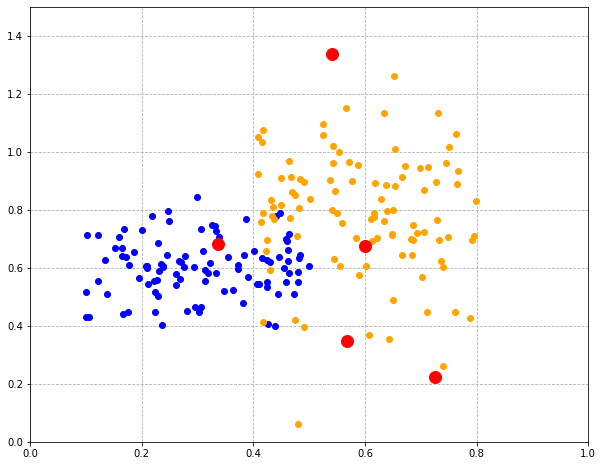

In [616]:
plt.figure(figsize=(10,8))
plt.plot(x1,y1,'o',color="blue")
plt.plot(x2,y2,'o',color="orange")
plt.plot(trial_set[:,0],trial_set[:,1],'ro',ms=12)
plt.xlim((0,1))
plt.ylim((0,1.5))
plt.grid(linestyle="--")

In [613]:
trial_set

array([[0.72569402, 0.22216908],
       [0.5996941 , 0.67547698],
       [0.54055285, 1.3380521 ],
       [0.56742985, 0.34674715],
       [0.33627446, 0.68230046]])

In [1]:
from IPython.core.display import HTML
styles = open("./styles/custom.css", "r").read()
HTML(styles)